<a href="https://colab.research.google.com/github/SAPUII/Project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# #ราคาทองคำ
# xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')

# #ราคาน้ำมันดิบ
# wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')

# #อัตราแลกเปลี่ยน
# ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')

# #หุ้น PTT
# ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')

# #หุ้น SCG
# scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')

# #หุ้น SOLAR
# solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')

In [3]:
# xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})

# wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})

# ex =ex.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})

# ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt','ปริมาณ': 'vol_ptt'})

# scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg','ปริมาณ': 'vol_scg'})

# solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar','ปริมาณ': 'vol_solar'})

##หุ้น PTT

In [4]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [5]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [6]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [7]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
# ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
# def multiply_by_million(value):
#     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
# ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59.50M
1,5/1/2022,39.00,76.59M
2,6/1/2022,38.00,71.68M
3,7/1/2022,38.75,59.56M
4,10/1/2022,38.50,34.79M
...,...,...,...
236,26/12/2022,32.25,39.66M
237,27/12/2022,32.50,80.79M
238,28/12/2022,32.75,49.82M
239,29/12/2022,32.75,61.35M


In [8]:
ptt['vol_ptt']=ptt['vol_ptt'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
ptt['vol_ptt'] = ptt['vol_ptt'].str.replace('M', '', regex=True)
ptt['vol_ptt']=ptt['vol_ptt'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['vol_ptt']=ptt['vol_ptt'].apply(multiply_by_million)
ptt['vol_ptt']=ptt['vol_ptt'].astype(int)
ptt

,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##หุ้น SCG

In [9]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [10]:
scg.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,6.15,6.10,6.15,6.05,183.00K,0.00%
1,5/1/2022,6.25,6.10,6.35,6.05,1.15M,1.63%
2,6/1/2022,6.10,6.25,6.25,6.10,133.50K,-2.40%
3,7/1/2022,6.10,6.05,6.15,6.05,205.10K,0.00%
4,10/1/2022,6.15,6.05,6.15,6.00,144.40K,0.82%


In [11]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [12]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,4/1/2022,6.15,183.00K
1,5/1/2022,6.25,1.15M
2,6/1/2022,6.10,133.50K
3,7/1/2022,6.10,205.10K
4,10/1/2022,6.15,144.40K
...,...,...,...
236,26/12/2022,4.80,37.00K
237,27/12/2022,4.84,62.50K
238,28/12/2022,4.86,41.50K
239,29/12/2022,4.88,47.90K


In [13]:
scg['vol_scg'] = scg['vol_scg'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['vol_scg']=scg['vol_scg'].astype(int)
scg

,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##หุ้น SOLAR

In [14]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [15]:
solar.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,1.51,1.52,1.54,1.49,9.13M,0.67%
1,5/1/2022,1.51,1.51,1.52,1.46,4.25M,0.00%
2,6/1/2022,1.44,1.51,1.51,1.44,9.95M,-4.64%
3,7/1/2022,1.24,1.37,1.37,1.23,93.48M,-13.89%
4,10/1/2022,1.24,1.25,1.27,1.22,21.28M,0.00%


In [16]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [17]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,4/1/2022,1.51,9.13M
1,5/1/2022,1.51,4.25M
2,6/1/2022,1.44,9.95M
3,7/1/2022,1.24,93.48M
4,10/1/2022,1.24,21.28M
...,...,...,...
236,26/12/2022,0.87,1.06M
237,27/12/2022,0.89,1.46M
238,28/12/2022,0.88,291.80K
239,29/12/2022,0.88,1.05M


In [18]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['vol_solar'] = solar['vol_solar'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['vol_solar']=solar['vol_solar'].astype(int)
solar

,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


## ราคาน้ำมันดิบ (WTI)

In [19]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [20]:
wti.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,2/1/2022,76.03,75.83,76.12,75.83,NaN,0.53%
1,3/1/2022,76.17,76.05,76.65,74.50,NaN,0.18%
2,4/1/2022,77.25,76.19,77.84,75.92,NaN,1.42%
3,5/1/2022,77.39,77.23,78.76,76.72,NaN,0.18%
4,6/1/2022,79.69,77.38,80.43,76.92,NaN,2.97%


In [21]:
wti.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [22]:
wti.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [23]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##ราคาทองคำ (XAU)

In [24]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [25]:
xau.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,"1,800.85","1,830.14","1,832.06","1,797.93",NaN,-1.51%
1,4/1/2022,"1,814.56","1,801.34","1,816.83","1,798.44",NaN,0.76%
2,5/1/2022,"1,809.53","1,814.90","1,829.82","1,807.97",NaN,-0.28%
3,6/1/2022,"1,788.68","1,809.94","1,811.89","1,786.03",NaN,-1.15%
4,7/1/2022,"1,795.63","1,789.55","1,799.20","1,782.63",NaN,0.39%


In [26]:
xau.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [27]:
xau.dtypes

วันเดือนปี     object
ล่าสุด         object
ราคาเปิด       object
สูงสุด         object
ต่ำสุด         object
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [28]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

,date,cp_xau
0,3/1/2022,1800.85
1,4/1/2022,1814.56
2,5/1/2022,1809.53
3,6/1/2022,1788.68
4,7/1/2022,1795.63
...,...,...
255,26/12/2022,1797.61
256,27/12/2022,1813.93
257,28/12/2022,1804.09
258,29/12/2022,1814.89


##อัตราแลกเปลี่ยน (EX)

In [29]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
ex.shape

(260, 7)

In [30]:
ex.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [31]:
ex.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [32]:
ex.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [33]:
ex =ex .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex = ex[['date' ,'cp_ex']]
ex

,date,cp_ex
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##Merge Table

In [34]:
tm1 = wti.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
all_data = tm5

In [35]:
all_data.isnull().any()

date         False
cp_wti       False
cp_ex         True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [36]:
all_data['date'] = all_data['date'].str.replace('/', '-')
all_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2-1-2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3-1-2022,76.17,33.24,1800.85,NaN,NaN,NaN,NaN,NaN,NaN
2,4-1-2022,77.25,33.25,1814.56,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,77.39,33.19,1809.53,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,79.69,33.55,1788.68,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,81.06,34.69,1797.61,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,79.84,34.60,1813.93,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,78.67,34.78,1804.09,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,78.67,34.62,1814.89,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [37]:
#all_data.to_csv('Project.csv', index=False)

##แทนค่าสูญหาย

In [38]:
all_data.isnull().any()

date         False
cp_wti       False
cp_ex         True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [39]:
all_data.columns

Index(['date', 'cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg',
       'vol_scg', 'cp_solar', 'vol_solar'],
      dtype='object')

In [40]:
from sklearn.impute import KNNImputer

# สร้าง object KNNImputer โดยระบุค่า K
imputer = KNNImputer(n_neighbors=2)

# ใช้ imputer.fit_transform() เพื่อแทนค่าสูญหายในข้อมูล
data_imputed = imputer.fit_transform(all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg',
       'vol_scg', 'cp_solar', 'vol_solar']])
# สร้าง DataFrame ใหม่จากผลลัพธ์ของ KNNImputer
data_imputed_df = pd.DataFrame(data_imputed, columns=all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg',
       'vol_scg', 'cp_solar', 'vol_solar']].columns)


In [41]:
# สร้าง DataFrame ของคอลัมน์ 'date'
date_column = all_data[['date']]

# รวม DataFrame ของ 'date' และ DataFrame ของข้อมูลที่แทนค่าสูญหาย
final_data = pd.concat([date_column, data_imputed_df], axis=1)
final_data = round(final_data, 2) #ทศนิยม 2 ตำแหน่ง
final_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2-1-2022,76.03,34.74,1802.43,31.25,47850000.0,4.82,50600.0,0.86,1084800.0
1,3-1-2022,76.17,33.24,1800.85,35.62,42305000.0,5.51,92950.0,1.06,10785900.0
2,4-1-2022,77.25,33.25,1814.56,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,77.39,33.19,1809.53,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,79.69,33.55,1788.68,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,81.06,34.69,1797.61,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,79.84,34.60,1813.93,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,78.67,34.78,1804.09,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,78.67,34.62,1814.89,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [42]:
final_data.isnull().any()

date         False
cp_wti       False
cp_ex        False
cp_xau       False
cp_ptt       False
vol_ptt      False
cp_scg       False
vol_scg      False
cp_solar     False
vol_solar    False
dtype: bool

In [43]:
# แทนที่เครื่องหมาย / ด้วย - ในคอลัมน์ date
#all_data['date'] = all_data['date'].str.replace('/', '-')

# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
final_data['cp_wti'] = final_data['cp_wti'] * final_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
final_data['cp_xau'] = final_data['cp_xau'] * final_data['cp_ex']
final_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2-1-2022,2641.2822,34.74,62616.4182,31.25,47850000.0,4.82,50600.0,0.86,1084800.0
1,3-1-2022,2531.8908,33.24,59860.2540,35.62,42305000.0,5.51,92950.0,1.06,10785900.0
2,4-1-2022,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [44]:
final_data.isnull().any()

date         False
cp_wti       False
cp_ex        False
cp_xau       False
cp_ptt       False
vol_ptt      False
cp_scg       False
vol_scg      False
cp_solar     False
vol_solar    False
dtype: bool

In [45]:
all_data = round(final_data, 2) #ทศนิยม 2 ตำแหน่ง
all_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2-1-2022,2641.28,34.74,62616.42,31.25,47850000.0,4.82,50600.0,0.86,1084800.0
1,3-1-2022,2531.89,33.24,59860.25,35.62,42305000.0,5.51,92950.0,1.06,10785900.0
2,4-1-2022,2568.56,33.25,60334.12,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,2568.57,33.19,60058.30,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,2673.60,33.55,60010.21,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,2811.97,34.69,62359.09,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,2762.46,34.60,62761.98,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,2736.14,34.78,62746.25,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,2723.56,34.62,62831.49,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [46]:
# save data
#all_data.to_csv('Project_data.csv', index=False)

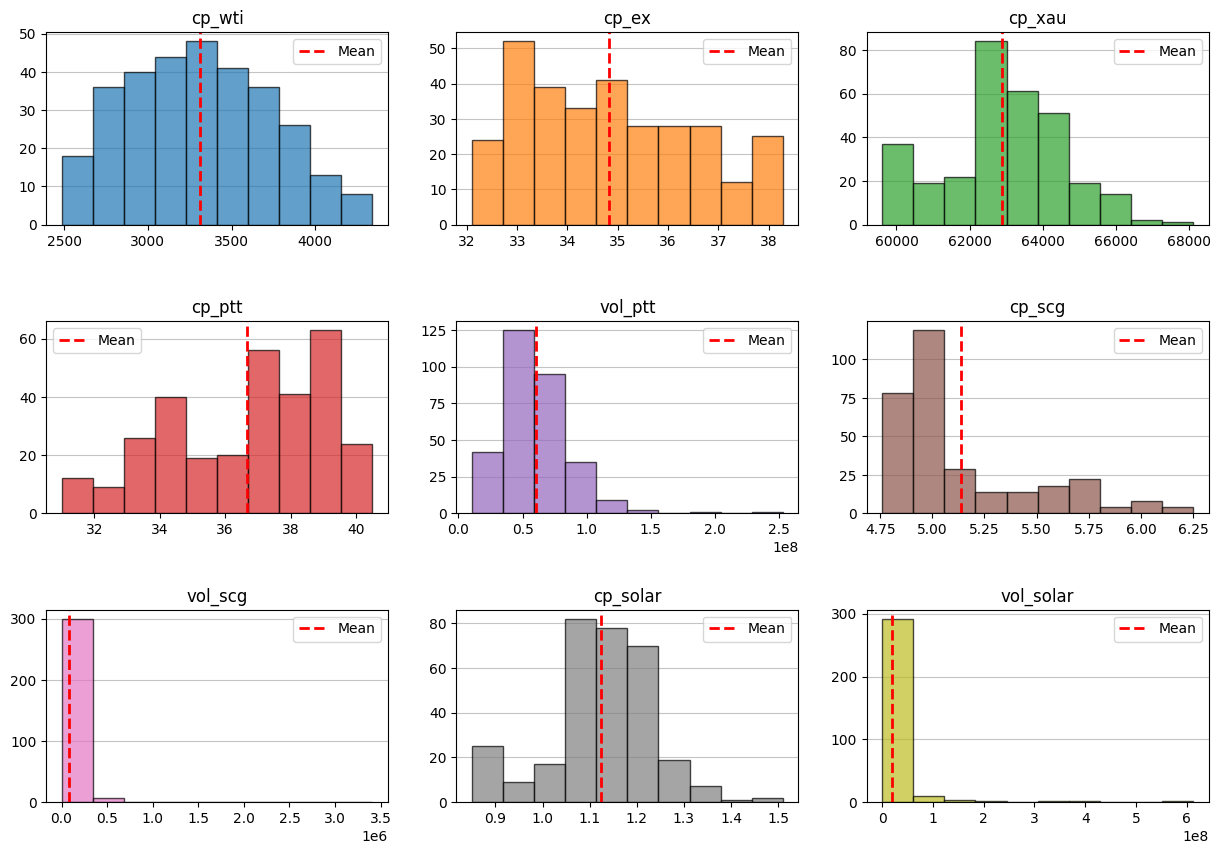

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดสีและ alpha สำหรับแต่ละคอลัมน์
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# สร้าง histogram สำหรับทุกคอลัมน์ที่เป็นตัวเลข
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(all_data.columns[1:]):
    ax = axes[i // 3, i % 3]
    n, bins, patches = ax.hist(all_data[col], bins=10, color=color[i], alpha=0.7, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.75)
    ax.set_axisbelow(True)

    # เพิ่มเส้นแนะนำ (แบบเส้นกำกับ) สำหรับค่าเฉลี่ย
    mean_value = all_data[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.legend()

plt.show()

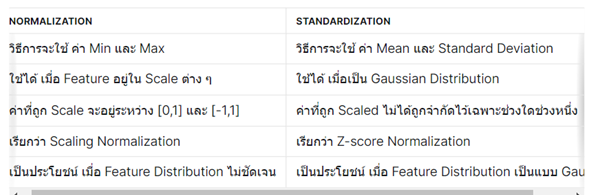

## Normalization

In [48]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2641.28,34.74,62616.42,31.25,47850000.0,4.82,50600.0,0.86,1084800.0
1,2531.89,33.24,59860.25,35.62,42305000.0,5.51,92950.0,1.06,10785900.0
2,2568.56,33.25,60334.12,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,2568.57,33.19,60058.30,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,2673.60,33.55,60010.21,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...
305,2811.97,34.69,62359.09,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,2762.46,34.60,62761.98,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,2736.14,34.78,62746.25,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,2723.56,34.62,62831.49,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# สร้าง object MinMaxScaler
scaler = MinMaxScaler()

# Fit และ Transform ข้อมูล
normalized_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
normalized_df = pd.DataFrame(normalized_data, columns=all_data_X.columns)

# สร้าง DataFrame ของคอลัมน์ 'date'
date = all_data[['date']]

# รวม DataFrame ของ 'date' และ DataFrame ของข้อมูลที่แทนค่าสูญหาย
cm_df = pd.concat([date, normalized_df], axis=1)
cm_df


,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2-1-2022,0.083968,0.427184,0.354079,0.026316,0.154132,0.040268,0.014492,0.015152,0.001296
1,3-1-2022,0.025035,0.184466,0.029363,0.486316,0.131255,0.503356,0.026916,0.318182,0.017144
2,4-1-2022,0.044791,0.186084,0.085191,0.736842,0.202195,0.932886,0.053333,1.000000,0.014439
3,5-1-2022,0.044796,0.176375,0.052696,0.842105,0.272701,1.000000,0.337010,1.000000,0.006467
4,6-1-2022,0.101380,0.234628,0.047030,0.736842,0.252444,0.899329,0.038811,0.893939,0.015779
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,0.175926,0.419094,0.323762,0.131579,0.120343,0.026846,0.010502,0.030303,0.001255
306,27-12-2022,0.149253,0.404531,0.371228,0.157895,0.290028,0.053691,0.017983,0.060606,0.001909
307,28-12-2022,0.135073,0.433657,0.369375,0.184211,0.162259,0.067114,0.011822,0.045455,0.000000
308,29-12-2022,0.128296,0.407767,0.379417,0.184211,0.209827,0.080537,0.013700,0.045455,0.001239


In [50]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # Fit และ Transform ข้อมูล
# scaled_data = scaler.fit_transform(all_data_X)

# # สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
# scaled_df = pd.DataFrame(scaled_data, columns=all_data_X.columns)

# # แสดงผลลัพธ์
#scaled_df

In [51]:
#หาความสัมพันธ์
correlation_matrix = normalized_df.corr()
correlation_matrix

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.062149,0.657987,0.147171,0.001308,-0.302296,-0.034391,0.263090,0.284907
cp_ex,0.062149,1.000000,0.129592,-0.627023,-0.171474,-0.641441,-0.124146,-0.387294,-0.149839
cp_xau,0.657987,0.129592,1.000000,-0.169960,-0.043696,-0.562866,-0.117020,-0.003048,0.156206
cp_ptt,0.147171,-0.627023,-0.169960,1.000000,0.016072,0.657390,-0.001330,0.737424,0.176706
vol_ptt,0.001308,-0.171474,-0.043696,0.016072,1.000000,0.098984,0.033273,-0.122545,-0.119206
cp_scg,-0.302296,-0.641441,-0.562866,0.657390,0.098984,1.000000,0.294844,0.565335,0.020350
vol_scg,-0.034391,-0.124146,-0.117020,-0.001330,0.033273,0.294844,1.000000,0.062713,0.024187
cp_solar,0.263090,-0.387294,-0.003048,0.737424,-0.122545,0.565335,0.062713,1.000000,0.351559
vol_solar,0.284907,-0.149839,0.156206,0.176706,-0.119206,0.020350,0.024187,0.351559,1.000000


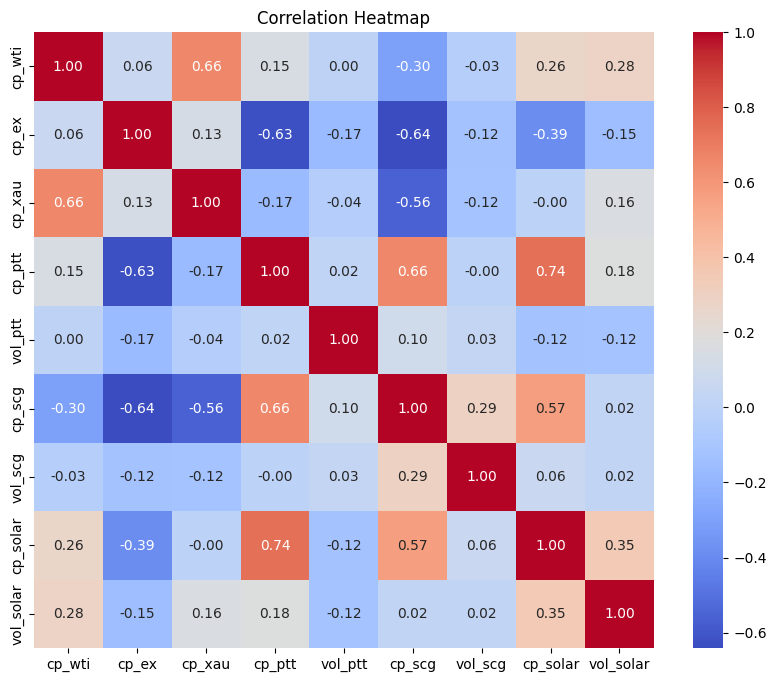

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

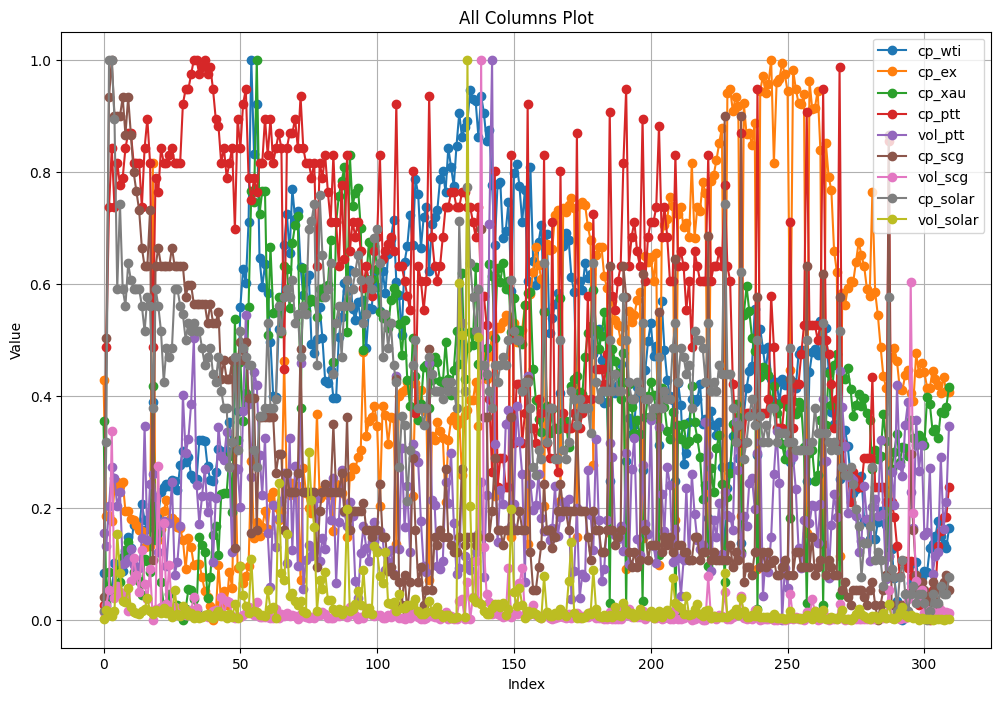

In [53]:
plt.figure(figsize=(12, 8))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [54]:
all_data_X.describe()

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
count,310.000000,310.000000,310.000000,310.000000,3.100000e+02,310.000000,3.100000e+02,310.000000,3.100000e+02
mean,3309.588290,34.832161,62888.156548,36.655387,6.025085e+07,5.139161,7.656290e+04,1.123710,2.000725e+07
std,422.500616,1.648135,1634.967121,2.378353,2.666819e+07,0.342782,2.501317e+05,0.111626,5.164857e+07
min,2485.420000,32.100000,59611.020000,31.000000,1.049000e+07,4.760000,1.200000e+03,0.850000,2.918000e+05
25%,2977.215000,33.360000,62144.900000,34.500000,4.054250e+07,4.902500,1.102500e+04,1.070000,3.602500e+06
50%,3275.455000,34.640000,62901.445000,37.000000,5.546250e+07,5.000000,2.452500e+04,1.130000,7.127500e+06
75%,3607.462500,36.142500,63978.000000,38.750000,7.521000e+07,5.300000,5.057500e+04,1.190000,1.492500e+07
max,4341.600000,38.280000,68098.960000,40.500000,2.528800e+08,6.250000,3.410000e+06,1.510000,6.123900e+08


#Split data PTT

In [55]:
a = normalized_df[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']]
a

,cp_ptt,cp_wti,cp_ex,cp_xau,vol_ptt
0,0.026316,0.083968,0.427184,0.354079,0.154132
1,0.486316,0.025035,0.184466,0.029363,0.131255
2,0.736842,0.044791,0.186084,0.085191,0.202195
3,0.842105,0.044796,0.176375,0.052696,0.272701
4,0.736842,0.101380,0.234628,0.047030,0.252444
...,...,...,...,...,...
305,0.131579,0.175926,0.419094,0.323762,0.120343
306,0.157895,0.149253,0.404531,0.371228,0.290028
307,0.184211,0.135073,0.433657,0.369375,0.162259
308,0.184211,0.128296,0.407767,0.379417,0.209827


In [58]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

# Assuming 'a' is your DataFrame containing the data

# Define the independent variables (features) and dependent variable (target)
X = a[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
y = a['cp_ptt']

# Define the size of your test set (you can adjust the ratio as needed)
test_size = int(len(X) * 0.2)

# Split the data into training and testing sets
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

# Define the neural network model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function
optimizer = Adam()
model.compile(optimizer=optimizer, loss='mse')

# Train the model on the training data
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse}")


2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE) : 0.32497960902073514


#LSTM

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import ParameterGrid
# from itertools import product

# # กำหนดตัวแปรอิสระและตัวแปรตาม
# X = a[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
# y = a['cp_ptt']

# # คำนวณจำนวนแถวที่ต้องการให้เป็นชุดข้อมูลการทดสอบ
# test_size = int(len(a) * 0.2)

# # ใช้ iloc เพื่อแบ่งชุดข้อมูล
# X_train = X.iloc[:-test_size]
# X_test = X.iloc[-test_size:]
# y_train = y.iloc[:-test_size]
# y_test = y.iloc[-test_size:]

In [ ]:
# # กำหนดพารามิเตอร์ที่จะทดลอง
# param_grid = {
#     'neurons_1': [100, 150],
#     'neurons_2': [50, 100],
#     'epochs': [50, 100, 200],
#     'batch_size': [32, 64, 128]
# }

# best_model = None
# best_mse = float('inf')

# # ลูปผ่านพารามิเตอร์ที่จะทดลอง
# for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
#     neurons_1, neurons_2, epochs, batch_size = params

#     # สร้างและคอมไพล์โมเดล LSTM
#     model = Sequential()
#     model.add(LSTM(neurons_1, activation='relu', input_shape=(X_train.shape[1], 1)))
#     model.add(Dense(neurons_2, activation='relu'))
#     model.add(Dense(1))
#     optimizer = Adam()
#     model.compile(optimizer=optimizer, loss='mse')

#     # แปลงข้อมูลให้เป็นรูปแบบที่เหมาะสมสำหรับ LSTM
#     X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

#     # ทำการฝึกโมเดล
#     model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

#     # ทดสอบโมเดล
#     X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
#     y_pred = model.predict(X_test_reshaped)

#     # คำนวณค่า MSE
#     mse = mean_squared_error(y_test, y_pred)

#     # บันทึกโมเดลที่มี MSE ต่ำที่สุด
#     if mse < best_mse:
#         best_mse = mse
#         best_model = model
#         best_params = {'neurons_1': neurons_1, 'neurons_2': neurons_2, 'epochs': epochs, 'batch_size': batch_size}

# print("Best Parameters:", best_params)
# print("Best MSE:", best_mse)

